# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:black; font-size:75%; text-align:center;padding:3.0px; background: #9181f8; border-bottom: 8px solid #211201" >  Predicting Effectively Cardiovascular Disease Using Machine Learning and Deep Learning Techniques <br> <div> 

# <div style="font-family: serif; font-weight: bold; letter-spacing: 0px; color: black; font-size: 50%; text-align: center; padding: 3.0px; background: #9181f8; border-bottom: 8px solid #211201;"><table style="border: none; color: #9181f8; text-align:left;"><tr>Student's Name: Sayed Mohammad Reza Dawodi</tr><br /><tr>Supervisors' Names: Dr. Asadullah Jawid & Dr. Umut Tousn</tr><br/><tr>Faculty: STEM (Science Technology Enginnering and Mathematics)</tr></table></div>


# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:black; font-size:80%; text-align:left; padding:3.0px; background: #e28815; border-bottom: 8px solid #211201" > Imports<br> <div> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:black; font-size:70%; text-align:left; padding:3.0px; background: #e28815; border-bottom: 8px solid #211201" > Reading the Dataset<br> <a href = "https://dx.doi.org/10.21227/dz4t-cm36" style = "color:black; font-size:50%;">Manu Siddhartha. (2020)<div> 

In [2]:
main_dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
main_dataset.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:black; font-size:80%; text-align:left; padding:3.0px; background: #1c88c0; border-bottom: 8px solid #211201" > Preprocessing<br> <div> 

In [3]:
main_dataset.shape

(1190, 12)

In [4]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


<b>Here is a summary of all columns:</b>
<ul><li>The dataset contains of 12 columns and 1190 rows</li><li>Except Oldpeak column (with float data type), all columns data type is integer</li></ul>


| Column         | Description                                             | Type|
| ---               | ---                                                     | :-:                   |
|age|Age of patients|(Numeric)  |
|sex| 1 = Male, 0 = Female|(Binary)|  
|chest pain type|Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4:  asymptomatic| (Nominal)|     
|resting bp s|Resting blood pressure in mm Hg| (Numeric) 
|cholesterol|Serum cholesterol in mg/dl| (Numeric)|                
|fasting blood sugar|fasting blood sugar > 120 mg/dl (1 = true; 0 = false)|(Binary)
|resting ecg|(Resting electrocardiogram results),Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |(Nominal)
|max heart rate|Any changes or amendments made to the original value of goods-related contracts   |(Numeric)
|exercise angina| Exercise induced angina, (1 = yes; 0 = no)|(Binary)
|oldpeak| oldpeak = ST, unit = depression |(Numeric)
|ST slope| (the slope of the peak exercise ST segment), Value 1: upsloping, Value 2: flat, Value 3: downsloping|(Nominal)
|target |1 = heart disease, 0 = Normal |(Binary)

<a href = "https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive"> Click "Download PDF" for more details?</a>

In [5]:
main_dataset.isnull().sum().sum()

0

In [6]:
main_dataset.duplicated().sum()

272

The dataset contains of 272 duplicated values. 
Let's Remove them :)

In [7]:
main_dataset.drop_duplicates(inplace = True)

In [8]:
main_dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:black; font-size:80%; text-align:left; padding:3.0px; background: #73daad; border-bottom: 8px solid #211201" > Exploratory Data Analysis<br> <div> 

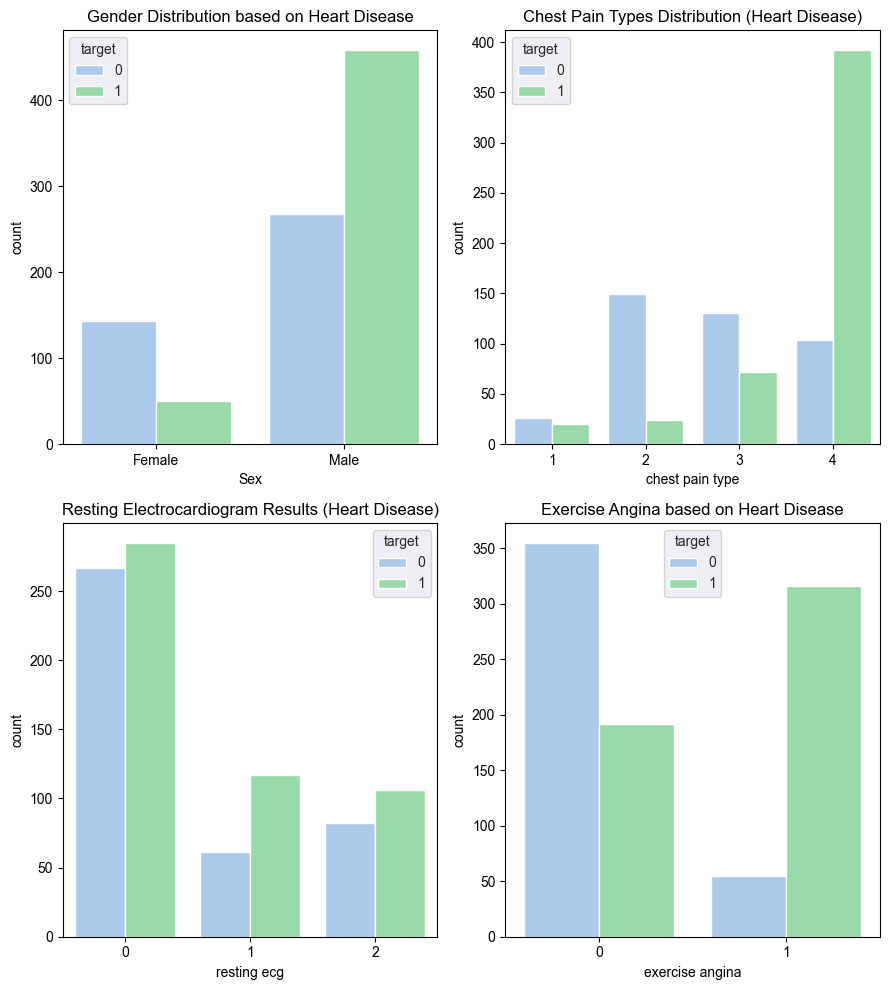

In [9]:
def plot_distributions(main_dataset):

    # Define figure and axes
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 10))
    sns.set_style("darkgrid")

    # Plot 1: Gender Distribution based on Heart Disease
    sns.countplot(data=main_dataset, x='sex', hue='target', palette='pastel6', ax=axs[0,0])
    axs[0,0].set_title('Gender Distribution based on Heart Disease')
    axs[0,0].set_xlabel('Sex')
    axs[0,0].set_xticklabels(['Female', 'Male'])

    #Plot 2: Chest Pain Types Distribution based on Heart Disease
    sns.countplot(data=main_dataset, x='chest pain type', hue = 'target', palette='pastel6', ax = axs[0,1])
    axs[0,1].set_title("Chest Pain Types Distribution (Heart Disease)")

    #Plot 3: Chest Pain Types Distribution based on Heart Disease
    sns.countplot(data=main_dataset, x='resting ecg', hue = 'target', palette='pastel6', ax = axs[1,0])
    axs[1,0].set_title("Resting Electrocardiogram Results (Heart Disease)")

    #Plot 4: Exercise Angina based on Heart Disease
    sns.countplot(data=main_dataset, x='exercise angina', hue = 'target', palette='pastel6', ax = axs[1,1])
    axs[1,1].set_title("Exercise Angina based on Heart Disease") 


    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()


plot_distributions(main_dataset)

1) The first count plot reveals a higher incidence of heart disease among males compared to females.
2) The second count plot reveals a higher incidence of heart disease among 

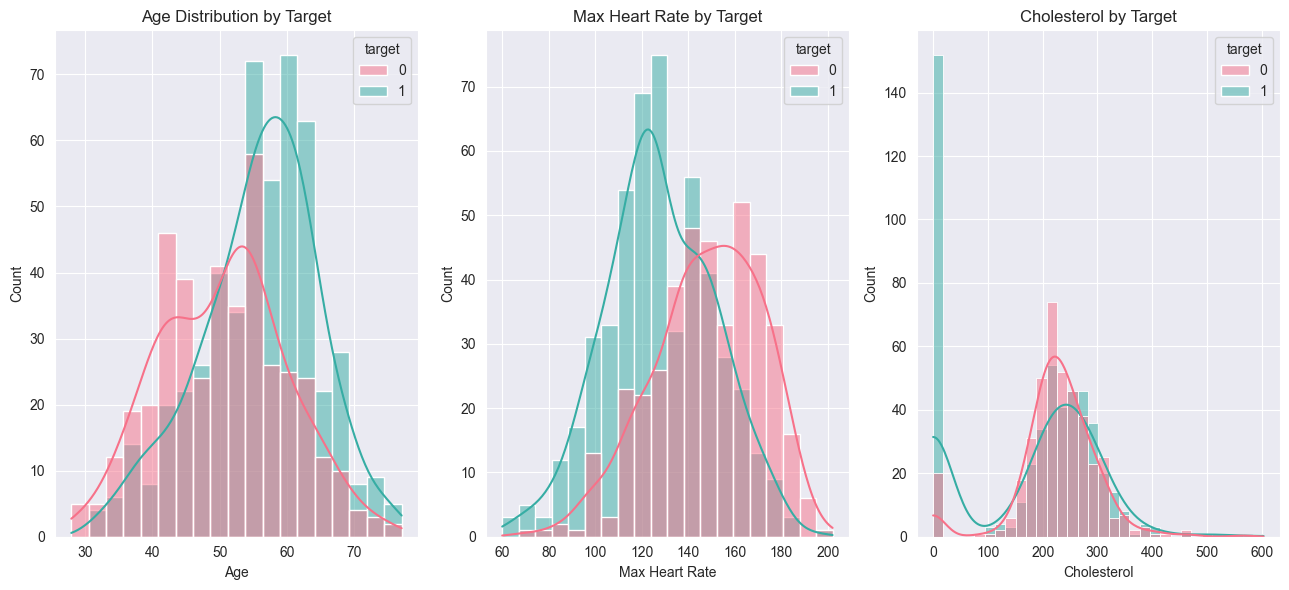

In [10]:
def numeric_dist(main_dataset):   
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))
    # Plot 1: Age Distribution by Target
    sns.histplot(data=main_dataset, x='age', hue='target', palette='husl', ax=axs[0], kde = True)
    axs[0].set_title('Age Distribution by Target')
    axs[0].set_xlabel('Age')

    # Plot 2: Max Heart Rate by Target
    sns.histplot(data = main_dataset, x = 'max heart rate', hue = 'target', palette = 'husl',ax = axs[1], kde = True)
    axs[1].set_title('Max Heart Rate by Target')
    axs[1].set_xlabel('Max Heart Rate')

    # Plot 3: Cholesterol by Target
    sns.histplot(data = main_dataset, x = 'cholesterol', hue = 'target', palette = 'husl', ax = axs[2], kde = True)
    axs[2].set_title('Cholesterol by Target')
    axs[2].set_xlabel('Cholesterol')

    plt.tight_layout()

    # Show plots
    plt.show()
    
numeric_dist(main_dataset)

1) The first density plot suggests that as patients' age increases, the likelihood of experiencing heart disease also rises.
2) The second density plot unveils that the heart rate of individuals with heart disease is notably lower ([60, 140]) compared to that of the population.
3) The third density plot reverals an increase of heart disease patients among individuals with 0 cholesterol. 
 

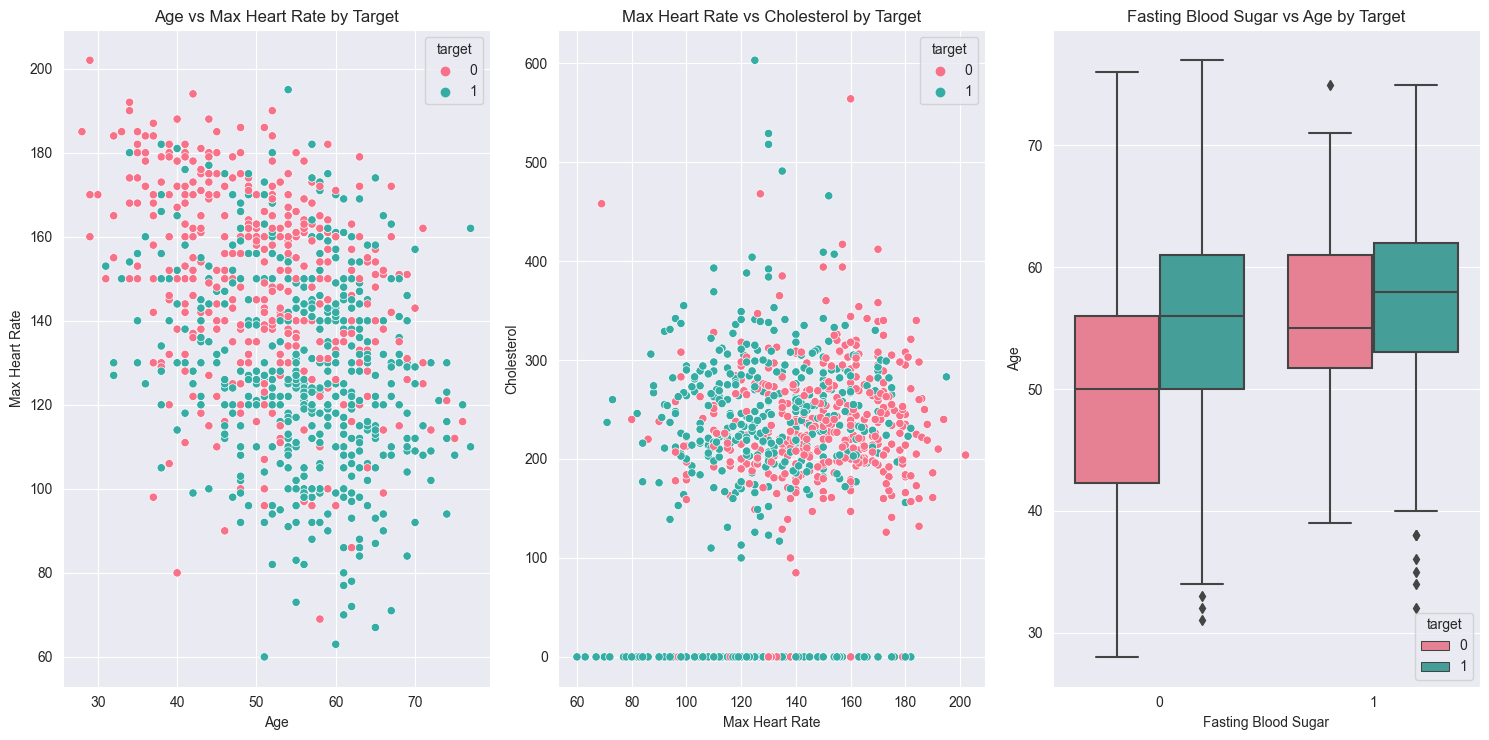

In [11]:
def bi_graphs(main_dataset):
   
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7.5))

    # Plot 1: Age vs Max Heart Rate by Target
    sns.scatterplot(data=main_dataset, x='age', y = 'max heart rate', hue='target', palette='husl', ax=axs[0])
    axs[0].set_title('Age vs Max Heart Rate by Target')
    axs[0].set_xlabel('Age')
    axs[0].set_ylabel('Max Heart Rate')

    # Plot 1: Age Distribution of Patients
    sns.scatterplot(data=main_dataset, x = 'max heart rate', y ='cholesterol', hue='target', palette='husl', ax=axs[1])
    axs[1].set_title('Max Heart Rate vs Cholesterol by Target')
    axs[1].set_xlabel('Max Heart Rate')
    axs[1].set_ylabel('Cholesterol')

    # Plot 1: Age vs Max Heart Rate by Target
    sns.boxplot(data=main_dataset, x='fasting blood sugar', y = 'age', hue='target', palette='husl', ax=axs[2])
    axs[2].set_title('Fasting Blood Sugar vs Age by Target')
    axs[2].set_xlabel('Fasting Blood Sugar')
    axs[2].set_ylabel('Age')


    plt.tight_layout()

    # Show plots
    plt.show()
    
bi_graphs(main_dataset)

# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:black; font-size:80%; text-align:left; padding:3.0px; background: #d55e5e; border-bottom: 8px solid #211201" > Choosing and Training Model<br> <div> 

In [39]:


X = main_dataset.drop('target', axis = 1)
y = main_dataset['target']
X = ((X - X.min())/(X.max() - X.min())).values
y = ((y - y.min())/(y.max() - y.min())).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
algorithms = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=2),
    'Gradient Boost': GradientBoostingClassifier(),
}
for name, clf in algorithms.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

Decision Tree Accuracy: 0.8206521739130435
KNN Accuracy: 0.8260869565217391
SVM Accuracy: 0.8206521739130435


Random Forest Accuracy: 0.8478260869565217
Gradient Boost Accuracy: 0.8478260869565217


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.810 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.837 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.878 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.762 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.747 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.776 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.774 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.551 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [16]:
grid.best_params_

{'C': 1000, 'gamma': 0.01}

In [17]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [18]:
grid.best_score_

0.8773926008759668

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = grid.predict(X_test)
predictions

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.])

In [20]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[62 17]
 [15 90]]


              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79        79
         1.0       0.84      0.86      0.85       105

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [35]:
rf = RandomForestClassifier(n_estimators=400, max_depth=20, min_samples_leaf=1, min_samples_split=10)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[64 15]
 [13 92]]
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        79
         1.0       0.86      0.88      0.87       105

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]          # Method of selecting samples for training each tree
}

# Instantiate Random Forest Classifier
rf = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [36]:
grid_search.best_score_

0.8773926008759668